## Import Library

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Input Gambar

In [5]:
image_path = 'mangga.jpg'
image = cv2.imread(image_path)

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

## Segmentasi Mangga

In [7]:
lower_mangga = np.array([30, 80, 80])
upper_mangga = np.array([70, 255, 255])
mask_mangga = cv2.inRange(hsv_image, lower_mangga, upper_mangga)

In [8]:
kernel = np.ones((5,5), np.uint8)
mask_mangga = cv2.morphologyEx(mask_mangga, cv2.MORPH_OPEN, kernel)
mask_mangga = cv2.morphologyEx(mask_mangga, cv2.MORPH_CLOSE, kernel)

In [9]:
segmentasi_mangga = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_mangga)

## Segmentasi Daun

In [10]:
lower_daun_hijau = np.array([25, 40, 40])
upper_daun_hijau = np.array([85, 255, 255])
mask_daun_hijau = cv2.inRange(hsv_image, lower_daun_hijau, upper_daun_hijau)

lower_daun_kuning = np.array([15, 100, 100])
upper_daun_kuning = np.array([30, 255, 255])
mask_daun_kuning = cv2.inRange(hsv_image, lower_daun_kuning, upper_daun_kuning)

mask_daun_total = cv2.bitwise_or(mask_daun_hijau, mask_daun_kuning)
mask_daun_final = cv2.subtract(mask_daun_total, mask_mangga)


segmentasi_daun = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_daun_final)

## Menampilkan Hasil

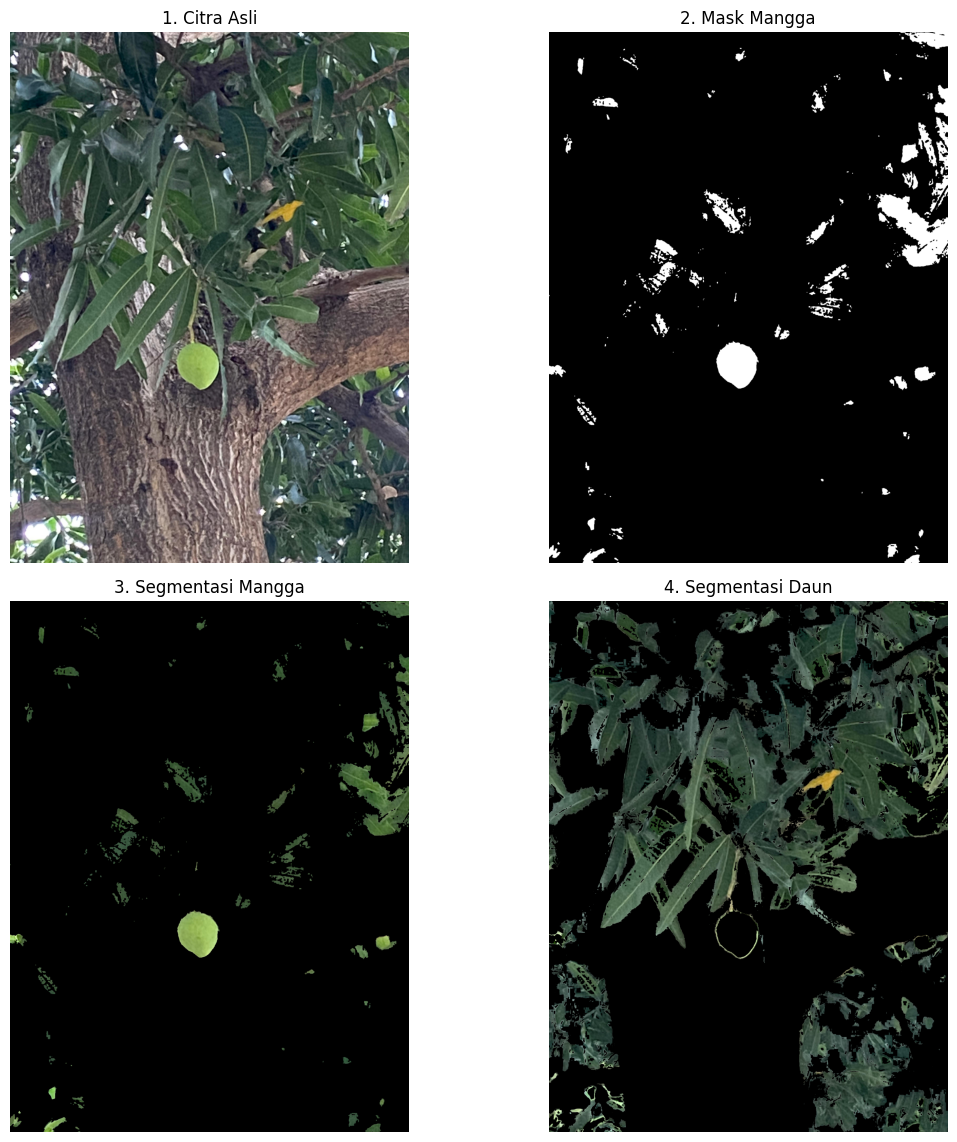

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('1. Citra Asli')
axs[0, 0].axis('off')

axs[0, 1].imshow(mask_mangga, cmap='gray')
axs[0, 1].set_title('2. Mask Mangga')
axs[0, 1].axis('off')

axs[1, 0].imshow(segmentasi_mangga)
axs[1, 0].set_title('3. Segmentasi Mangga')
axs[1, 0].axis('off')

axs[1, 1].imshow(segmentasi_daun)
axs[1, 1].set_title('4. Segmentasi Daun')
axs[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()